# Section evaluation of sst

make section through different grids by using pyicon ckdtree_section for the icon data and xarray.where for the satellite data

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
ccrs_proj = ccrs.PlateCarree()

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [2]:
r = 6371000
const_lat = 32 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[0])
print('distance of one degree in meter at section', delta[const_lat])

distance of one degree in meter at equator 111194.92664455873
distance of one degree in meter at section 93927.02124530253


In [3]:
clim = 0, 24

## Satellite data

In [4]:
path_data  = '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/daily/2010/'
search_str = f'MODIS-AQUA__C6__SST_v2019.0__4km__2010*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [5]:
sata = xr.open_mfdataset(flist[:90], combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))

In [44]:
sata.lon[100]-sata.lon[99]

<xarray.DataArray 'lon' ()>
array(0.04167175, dtype=float32)

In [6]:
# visualize in region and section
lon_reg = [-85, -45]
lat_reg = [30, 38]
sst_sat = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


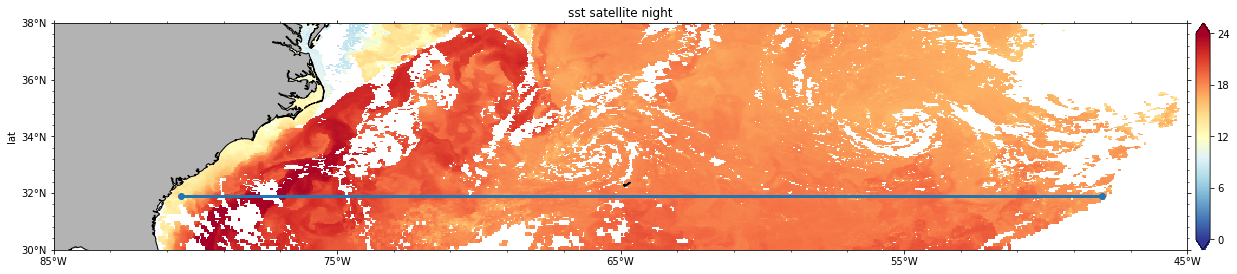

In [8]:
t=79
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.2, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_night, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
lonl = -80.5, -48
latl = 31.9, 31.9
ax.plot(lonl, latl, transform=ccrs_proj, linewidth=3, marker='o', markersize=6)

ax.set_title('sst satellite night')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

plt.savefig('../images/slice')

### make section for sst

In [9]:
lon_reg = lonl
lat_reg = 31.89, 31.91
sst_sec = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
sst_sec = sst_sec.isel(time=t)
sst_sat = sst_sec.sst_night

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [10]:
d_sat = sst_sat.lon[1] - sst_sat.lon[0]
d_sat_res = d_sat.data * delta[32]
print('resolution: in degree', d_sat.data, 'and in meter at section', d_sat_res)

resolution: in degree 0.041671753 and in meter at section 3914.1036227557556


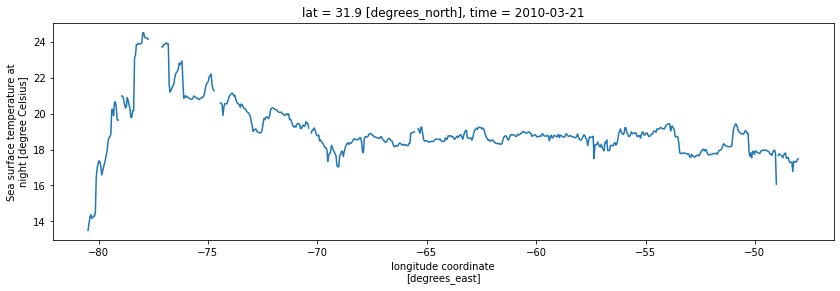

In [11]:
sst_sat.plot(figsize=(14,4))

### multiple slices

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


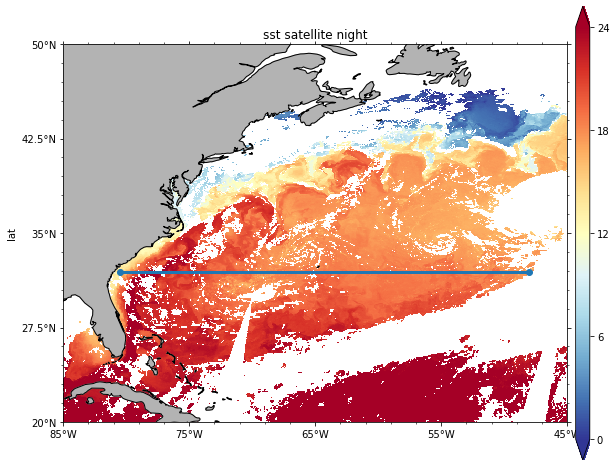

In [29]:
# visualize in region and section
lon_reg = [-85, -45]
lat_reg = [20, 50]
sst_sat = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)

t=79
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.9, fig_size_fac=4, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(sst_sat.lon, sst_sat.lat, sst_sat.isel(time=t).sst_night, ax=ax, cax=cax, clim=clim, transform=ccrs_proj, rasterized=False)
lonl = -80.5, -48
latl = 31.9, 31.9
ax.plot(lonl, latl, transform=ccrs_proj, linewidth=3, marker='o', markersize=6)

ax.set_title('sst satellite night')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

#plt.savefig('../images/slice')

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True})

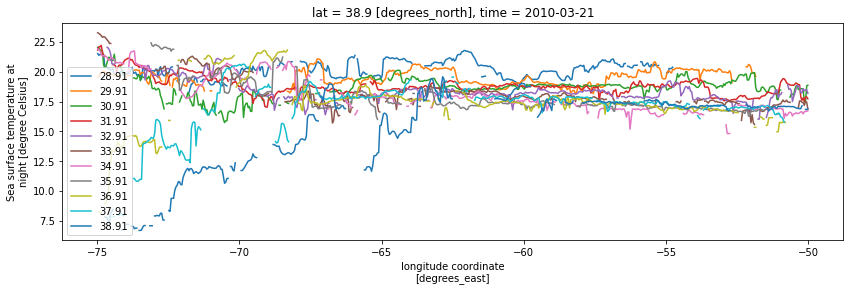

In [30]:
lon_reg = -75, -50
lat_reg = 27.89, 27.91

fig = plt.figure(figsize=(14,4))
for ii in np.arange(11):
    lat_reg = lat_reg + np.ones(2)
    sst_sec = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
    sst_sec = sst_sec.isel(time=t)
    sst_sat = sst_sec.sst_night
    sst_sat.plot(label=f"{lat_reg[1]}")

plt.legend()

# unstructured Grids

## SMT

In [12]:
run      = 'ngSMT_tke'
gname = 'smt'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'

path_grid        = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree     = f'{path_grid}ckdtree/'
fpath_ckdtree    = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [13]:
month = '01'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
search_str = f'_T_S_sp_001-016_2010*.nc' 
flist1      = np.array(glob.glob(path_data+search_str))
flist1.sort()
month = '02'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
search_str = f'_T_S_sp_001-016_2010*.nc' 
flist2      = np.array(glob.glob(path_data+search_str))
flist2.sort()
month = '03'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
search_str = f'_T_S_sp_001-016_2010*.nc' 
flist3      = np.array(glob.glob(path_data+search_str))
flist3.sort()

flist = [*flist1, *flist2, *flist3]
flist.sort()

In [14]:
time0 = np.datetime64('2010-01-09T01:00:00')
dti = pd.date_range(time0, periods=984, freq="2h")
smt = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
smt = smt.assign_coords(time=dti)

approximated maximum number of triangular gridpoints along section
(if npoints would be choosen to high neigherst neighbour method could select the same value more then once)

res = 111000/600  # 1 degree in meter at equator divided by approx grid resolution at equator
npoints = np.abs(lonl[1] - lonl[0]) * res
print('points per degree', res, 'max approx points per section', npoints)

### section

In [15]:
npoints = 4000

sname         = 'A'
tgname        = 'SMT'
gname         = 'OceanOnly_SubmesoNA_2500m_srtm30'
path_tgrid    = f'/pool/data/ICON/oes/grids/OceanOnly/'
fname_tgrid   = f'{gname}.nc'
path_scratch  = f'/scratch/u/u241317/tmp/'
path_ckdtree  = path_scratch # where grid is stored

lon = lonl
lat = 31.9, 31.9

dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon[1],lat[0]], p2=[lon[0],lat[0]], npoints=npoints,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/SMT_nps4000_48W31.9N_80.5W31.9N.npz


### analyse grid resolutions

In [16]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
grid  = sgrid.cell_area_p.compute()
Clon  =  grid.clon * 180/np.pi
grid  = grid.assign_coords(clon=Clon)
Clat  =  grid.clat * 180/np.pi
grid  = grid.assign_coords(clat=Clat)
grid  = np.sqrt(grid.isel(cell=ickdtree))
grid  = grid.assign_coords({"lon_sec": ("cell", lon_sec)})
grid_smt = grid.assign_coords({"lat_sec": ("cell", lat_sec)})
# section distance
d_smt_sec = (grid_smt.lon_sec[0] - grid_smt.lon_sec[1]).data *delta[32]
d_smt_hi_res = grid_smt.min().data

print('max',grid_smt.max().data, 'min', grid_smt.min().data, 'distance section', d_smt_sec)

max 787.4848864863045 min 554.3990887684248 distance section 763.3478845889707


Text(0.5, 1.0, 'Resolution of Original grid and spacing of section sampling SMT')

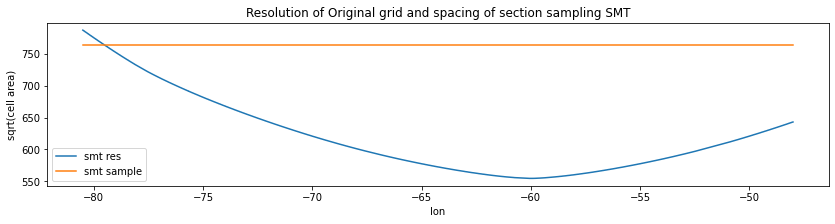

In [17]:
fig = plt.figure(figsize=(14,3))
grid_smt.plot(x="clon", label='smt res')
plt.plot(lon, ([d_smt_sec, d_smt_sec]), label='smt sample')
plt.xlabel('lon')
plt.ylabel('sqrt(cell area)')
plt.legend()
plt.title('Resolution of Original grid and spacing of section sampling SMT')

### spatial series

In [18]:
t = 71*12
sst_smt = smt.isel(time=t).T001_sp
sst_smt = sst_smt.isel(ncells=ickdtree)
sst_smt = sst_smt.assign_coords({"clon": ("ncells", lon_sec)})

In [19]:
smt_ii = smt.isel(ncells=ickdtree)

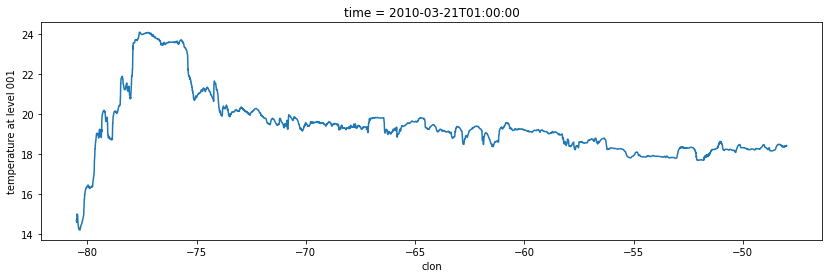

In [20]:
sst_smt.plot(x="clon", figsize=(14,4))

## r2b8

# convert to meter
r = 6371000
const_lat = 40 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)

res = 111000/10000
npoints = np.abs(lonl[1] - lonl[0]) * res 
print('points per degree', res, 'max approx points per section', npoints)

approximated maximum number of triangular gridpoints along section
(if npoints would be choosen to high neigherst neighbour method could select the same value more then once)

In [21]:
npoints = 300

sname   = 'A'
tgname  = 'B'
gname   = 'r2b8_oce_r0004_tgrid'
path_tgrid    = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/'
fname_tgrid   = f'{gname}.nc'
path_scratch  = f'/scratch/u/u241317/tmp/'
path_ckdtree  = path_scratch # where grid is saved

lon_reg = -80.5, -48
lat_reg = 31.9, 31.9

dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon_reg[1],lat_reg[0]], p2=[lon_reg[0],lat_reg[0]], npoints=npoints,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/B_nps300_48W31.9N_80.5W31.9N.npz


In [22]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
grid  = sgrid.cell_area_p.compute()
Clon  =  grid.clon * 180/np.pi
grid  = grid.assign_coords(clon=Clon)
Clat  =  grid.clat * 180/np.pi
grid  = grid.assign_coords(clat=Clat)
grid  = np.sqrt(grid.isel(ncells=ickdtree))
grid  = grid.assign_coords({"lon_sec": ("ncells", lon_sec)})
grid_r2b8 = grid.assign_coords({"lat_sec": ("ncells", lat_sec)})
# section distance
d_r2b8_sec = (grid_r2b8.lon_sec[0] - grid_r2b8.lon_sec[1]).data *delta[32]
d_r2b8_hi_res = grid_r2b8.min().data

print('max',grid_r2b8.max().data, 'min', grid_r2b8.min().data, 'distance section', d_r2b8_sec)

max 9965.12512967416 min 9705.941189521574 distance section 10209.458831011232


In [23]:
#fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/ckdtree/rectgrids/r2b8_oce_r0004_res0.10_180W-180E_90S-90N.nc'
path_data = '/work/mh0033/m211054/projects/icon/icon-oes-1.3.01/experiments/exp.ocean_era51h_r2b8_hel20218-ERA/outdata/'
search_str = f'exp.ocean_era51h_r2b8_hel20218-ERA_2010*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [24]:
r2b8 = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
sst_r2b8 = r2b8.isel(depth=0).to
sst_r2b8 = sst_r2b8.isel(time=2)
sst_r2b8 = sst_r2b8.isel(ncells=ickdtree)
sst_r2b8 = sst_r2b8.assign_coords({"clon": ("ncells", lon_sec)})

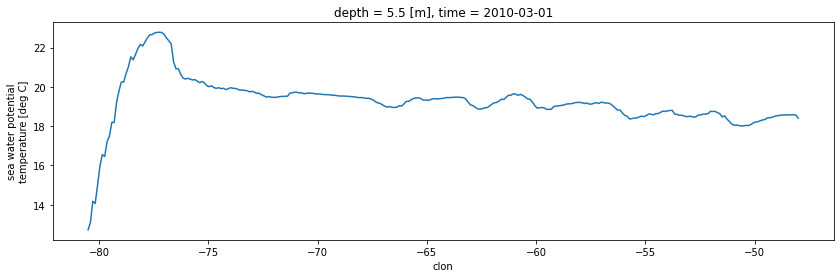

In [25]:
sst_r2b8.plot(x="clon", figsize=(14,4))

x = sst_r2b8.data
x.compute()

# FFT of satellite, smt and r2b8 sections

In [26]:
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
from scipy import stats    #Used for 2D binned statistics
from mpl_toolkits.axes_grid1 import make_axes_locatable #For plotting interior colobars
#import spectrum

#from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft 



linear interpolation for nan in spatial series of satellite data

In [27]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

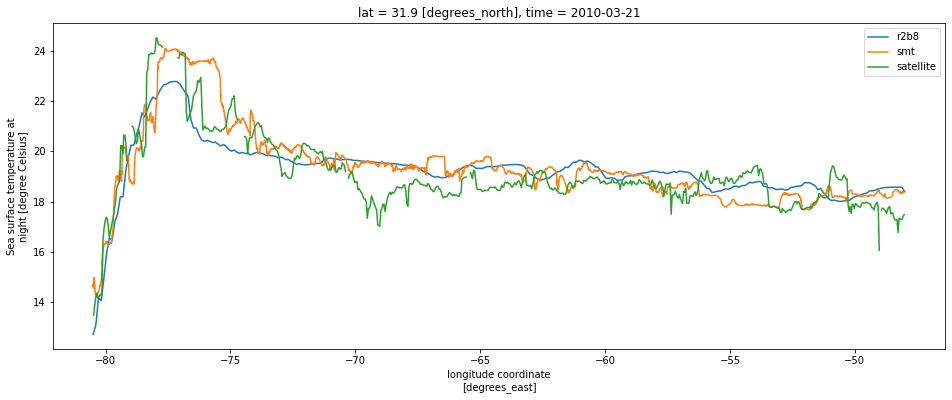

In [28]:
fig = plt.figure(figsize=(16,6))
sst_r2b8.plot(x="clon", label='r2b8')
sst_smt.plot(x="clon", label='smt')
sst_sat.plot(label='satellite')
plt.legend()
plt.savefig('../images/sst_section')

compare "interploated" distances in degree and meter

In [29]:
print('in meter:' , 'smt hi res', d_smt_hi_res, 'smt section', d_smt_sec, 'r2b8 hi res', d_r2b8_hi_res, 'r2b8 section', d_r2b8_sec, 'satellite hi res at section', d_sat_res)


in meter: smt hi res 554.3990887684248 smt section 763.3478845889707 r2b8 hi res 9705.941189521574 r2b8 section 10209.458831011232 satellite hi res at section 3914.1036227557556


rr2b8 = r2b8.isel(time=1).to.isel(depth=0)
rr2b8 = rr2b8.compute()
data = rr2b8
#rr2b8 = data.where((data.clat > lat_reg[0]) & (data.clat < lat_reg[1]) & (data.clon > lon_reg[0]) & (data.clon < lon_reg[1]), drop=True)
rr2b8


### sampling distance
d_smt = sst_smt.clon[0] - sst_smt.clon[1]
d_r2b8 = sst_r2b8.clon[0] - sst_r2b8.clon[1]
d_sat = sst_sat.lon[1] - sst_sat.lon[0]
print('in degrees:', 'smt model', d_smt.data, 'r2b8 model', d_r2b8.data, 'satellite', d_sat.data)
# convert to meter
r = 6371000
const_lat = 32 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[0])
print('distance of one degree in meter at section', delta[const_lat])

dm_smt = d_smt.data * delta[const_lat]
dm_r2b8 = d_r2b8.data * delta[const_lat]
dm_sat = d_sat.data * delta[const_lat]
print('in meter:', 'smt model', dm_smt, 'r2b8 model', dm_r2b8, 'satellite', dm_sat)

### non smoothed fft of a daily signal

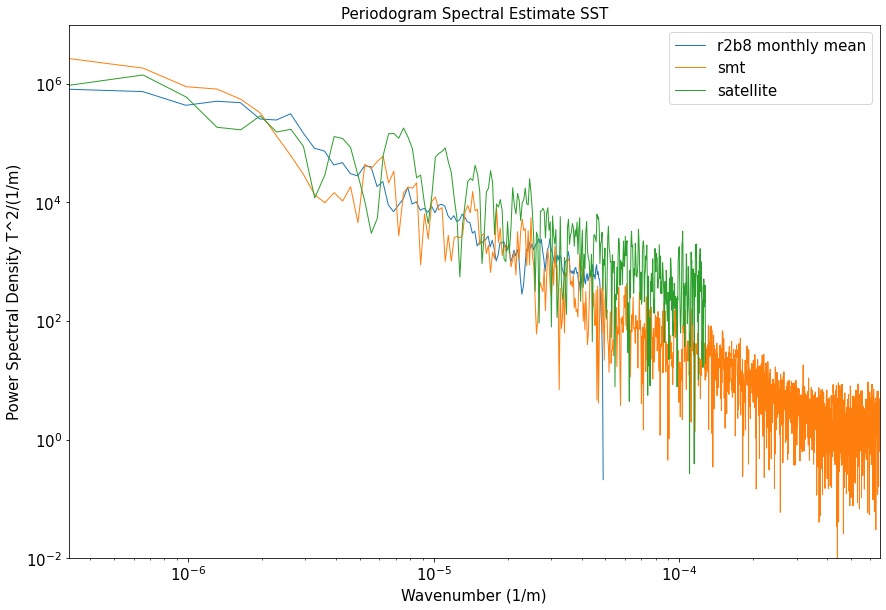

In [32]:

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# model
cv = sst_r2b8 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_r2b8_sec)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label="r2b8 monthly mean")
cv = sst_smt 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_smt_sec)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label="smt")
# satellite
cv = sst_sat[:].data.compute() 
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label="satellite")

ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 1e7)
#ax.set_xlim(1e-10, 1e-3)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density T^2/(1/m)',fontsize=15)
plt.title('Periodogram Spectral Estimate SST',fontsize=15);
plt.savefig('../images/glance_sst', bbox_inches='tight')

### smoothed

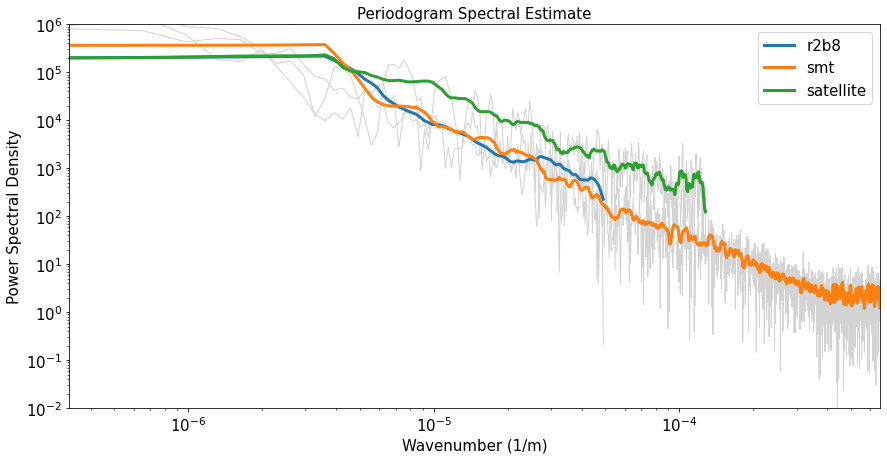

In [33]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# model
cv = sst_r2b8 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_r2b8_sec)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
Sr = np.convolve(S, kernel, mode='same')
fr = f

cv = sst_smt 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_smt_sec)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
S = np.convolve(S, kernel, mode='same')
fs = f
Ss = S

# satellite
cv = sst_sat[:].data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
S = np.convolve(S, kernel, mode='same')
fsa = f
Ssa = S

#smoothed
ax.loglog(fr[np.where(fr>=0)], Sr[np.where(fr>=0)], linewidth=3,  label="r2b8")
ax.loglog(fs[np.where(fs>=0)], Ss[np.where(fs>=0)], linewidth=3,  label="smt")
ax.loglog(fsa[np.where(fsa>=0)], Ssa[np.where(fsa>=0)], linewidth=3,  label="satellite")

#ax.loglog(np.exp([1e-5, 1e-4]), np.exp([1e4, 1e2]), color='crimson')

ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 1e6)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram Spectral Estimate',fontsize=15);
plt.savefig('../images/fft_sst', bbox_inches='tight')

In [30]:
sst_smt

<xarray.DataArray 'T001_sp' (ncells: 4000)>
dask.array<getitem, shape=(4000,), dtype=float32, chunksize=(4000,), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2010-03-21T01:00:00
    clon     (ncells) float64 -48.0 -48.01 -48.02 -48.02 ... -80.48 -80.49 -80.5
Dimensions without coordinates: ncells
Attributes:
    standard_name:                temperature at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [36]:
Ss.shape

(2001,)

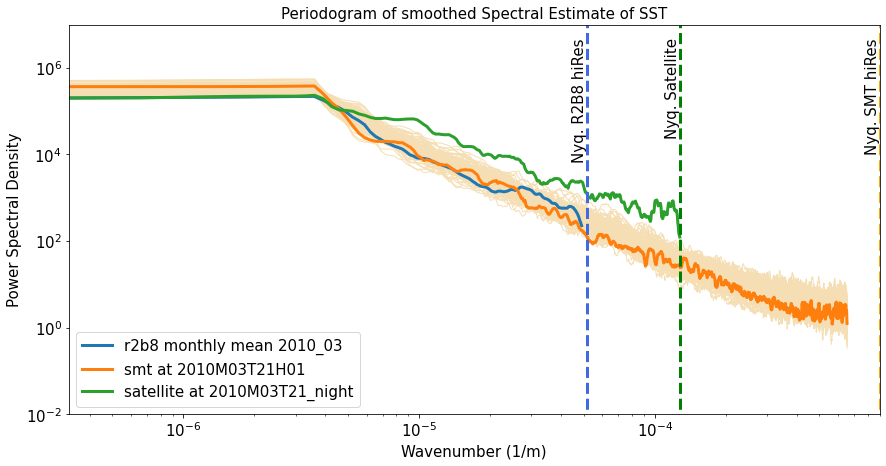

In [34]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for ii in np.arange(984)[::10]:
    sst_smt_ii = smt_ii.isel(time=ii).T001_sp
    cv = sst_smt_ii 
    f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_smt_sec)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='wheat')

cv = sst_smt 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_smt_sec)
S = S.squeeze()
#ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
S = np.convolve(S, kernel, mode='same')
fs = f
Ss = S

# model
cv = sst_r2b8 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_r2b8_sec)
S = S.squeeze()
#ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
Sr = np.convolve(S, kernel, mode='same')
fr = f

# satellite
cv = sst_sat[:].data.compute() 
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
S = S.squeeze()
#ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
S = np.convolve(S, kernel, mode='same')
fsa = f
Ssa = S

#smoothed
tr = sst_r2b8.time.data
ax.loglog(fr[np.where(fr>=0)], Sr[np.where(fr>=0)], linewidth=3,  label=f"r2b8 monthly mean 2010_03")
tsmt = sst_smt.time.data
ax.loglog(fs[np.where(fs>=0)], Ss[np.where(fs>=0)], linewidth=3,  label=f"smt at 2010M03T21H01")
tsat = sst_sat.time.data
ax.loglog(fsa[np.where(fsa>=0)], Ssa[np.where(fsa>=0)], linewidth=3,  label=f"satellite at 2010M03T21_night")

#r2b8 10km resolution
px = np.ones(2)/(2*d_r2b8_hi_res)
py = 1e-3, 1e7
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_r2b8_hi_res), 5e6, 'Nyq. R2B8 hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

#smt resolution
px = np.ones(2)/(2*d_smt_hi_res)
ax.plot(px, py,  linewidth=3, linestyle='--', color='orange')
ax.text(1/(2*d_smt_hi_res), 5e6, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*d_sat_res)
ax.plot(px, py,  linewidth=3, linestyle='--', color='green')
ax.text(1/(2*d_sat_res), 5e6, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)


ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 1e7)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density T^2/(1/m)',fontsize=15)
plt.title('Smoothed Spectral Estimate SST',fontsize=15);
plt.savefig('../images/fft_sst_r', bbox_inches='tight')

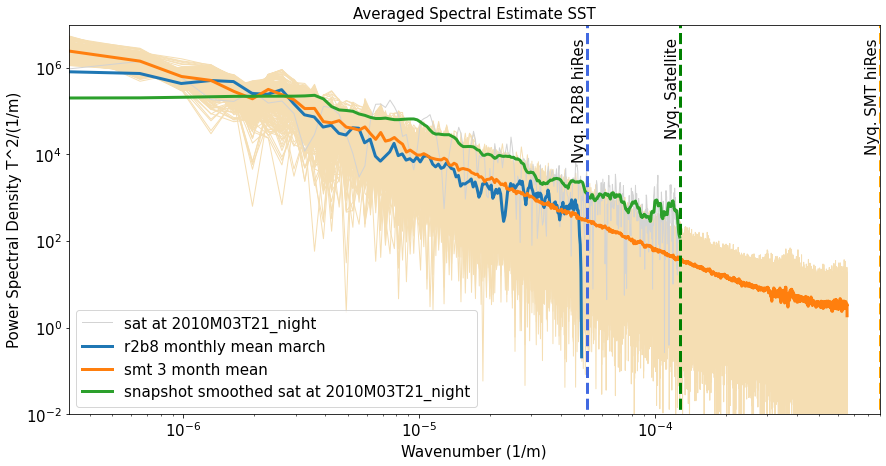

In [41]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
iii = 0
A_smt = np.zeros((328,2001)) #33 & 3
for ii in np.arange(984)[::3]:
    sst_smt_ii = smt_ii.isel(time=ii).T001_sp
    cv = sst_smt_ii 
    f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_smt_sec)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='wheat')


S = np.mean(A_smt, axis=0)
#ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
#S = np.convolve(S, kernel, mode='same')
fs = f
Ss = S

# model
cv = sst_r2b8 
f, S = sg.periodogram(cv-np.mean(cv), fs=1/d_r2b8_sec)
S = S.squeeze()
#ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey')
Sr = S# np.convolve(S, kernel, mode='same')
fr = f

# satellite
cv = sst_sat[:].data.compute() 
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color='lightgrey', label='sat at 2010M03T21_night')
S = np.convolve(S, kernel, mode='same')
fsa = f
Ssa = S

#smoothed
tr = sst_r2b8.time.data
ax.loglog(fr[np.where(fr>=0)], Sr[np.where(fr>=0)], linewidth=3,  label=f"r2b8 monthly mean march")
tsmt = sst_smt.time.data
ax.loglog(fs[np.where(fs>=0)], Ss[np.where(fs>=0)], linewidth=3,  label=f"smt 3 month mean")
tsat = sst_sat.time.data
ax.loglog(fsa[np.where(fsa>=0)], Ssa[np.where(fsa>=0)], linewidth=3,  label=f"snapshot smoothed sat at 2010M03T21_night")

#r2b8 10km resolution
px = np.ones(2)/(2*d_r2b8_hi_res)
py = 1e-3, 1e7
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_r2b8_hi_res), 5e6, 'Nyq. R2B8 hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

#smt resolution
px = np.ones(2)/(2*d_smt_hi_res)
ax.plot(px, py,  linewidth=3, linestyle='--', color='orange')
ax.text(1/(2*d_smt_hi_res), 5e6, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*d_sat_res)
ax.plot(px, py,  linewidth=3, linestyle='--', color='green')
ax.text(1/(2*d_sat_res), 5e6, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)


ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-1, 1e7)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density T^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimate SST',fontsize=15);
plt.savefig('../images/fft_sst_robust', bbox_inches='tight')

In [62]:
from mne_features.univariate import compute_spect_slope
from mne_features.utils import power_spectrum

ModuleNotFoundError: No module named 'mne_features'

In [60]:
1/2/d_r2b8_hi_res

5.151483923473536e-05

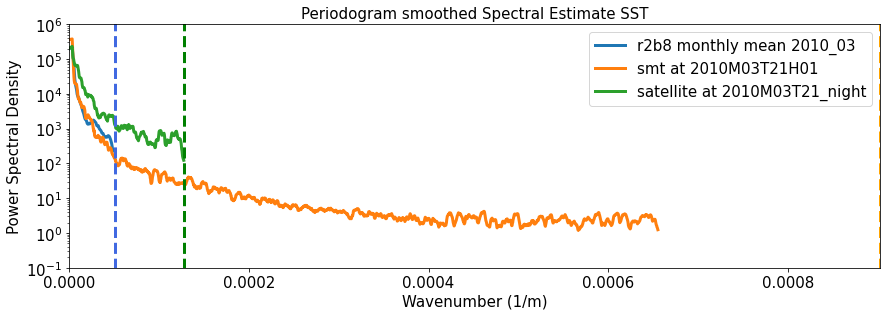

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

#smoothed
ax.semilogy(fr[np.where(fr>=0)], Sr[np.where(fr>=0)], linewidth=3,  label="r2b8 monthly mean 2010_03")
ax.semilogy(fs[np.where(fs>=0)], Ss[np.where(fs>=0)], linewidth=3,  label="smt at 2010M03T21H01")
ax.semilogy(fsa[np.where(fsa>=0)], Ssa[np.where(fsa>=0)], linewidth=3,  label="satellite at 2010M03T21_night")

#r2b8 10km resolution
px = np.ones(2)/(2*d_r2b8_hi_res)
py = 1e-3, 1e7
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
#ax.text(1/(2*d_r2b8_hi_res), 5e6, 'Nyq. R2B8 hiRes', ha='right', va='top',rotation='vertical', fontsize=10)

#smt resolution
px = np.ones(2)/(2*d_smt_hi_res)
ax.plot(px, py,  linewidth=3, linestyle='--', color='orange')
#ax.text(1/(2*d_smt_hi_res), 5e6, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=10)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*d_sat_res)
ax.plot(px, py,  linewidth=3, linestyle='--', color='green')
#ax.text(1/(2*d_sat_res), 5e6, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=10)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-1, 1e6)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram smoothed Spectral Estimate SST',fontsize=15);
plt.savefig('../images/fft_sst_semi', bbox_inches='tight')

multiple satellite data

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True})

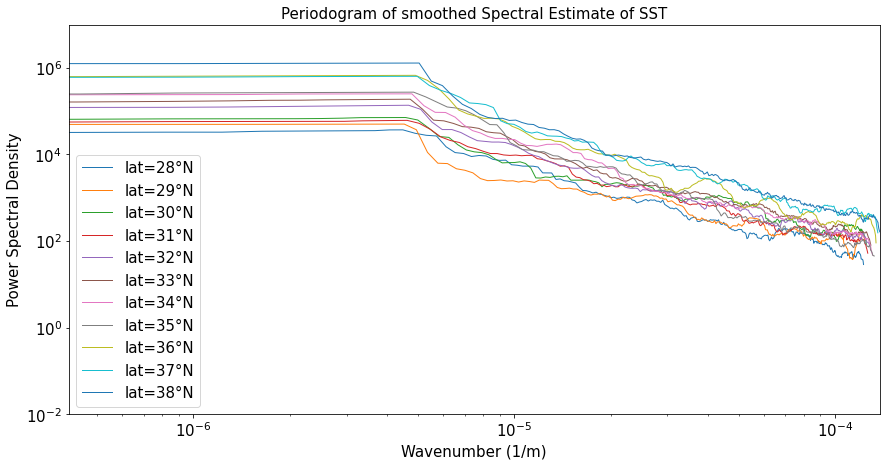

In [60]:
lon_reg = -75, -50
lat_reg = 27.9, 28.1
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
lati = 27
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for ii in np.arange(11):
    lat_reg = lat_reg + np.ones(2)
    sst_sec = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
    sst_sec = sst_sec.isel(time=t)
    sst_sat = sst_sec.sst_night
    d_sat = sst_sat.lon[1] - sst_sat.lon[0]
    lati +=1
    d_sat_res = d_sat.data * delta[lati]
    cv = sst_sat[:].data.compute() 
    cv = cv[0,:]
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label=f"lat={lati}°N")



ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 1e7)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram of smoothed Spectral Estimate of SST',fontsize=15);
#plt.savefig('../images/fft_sst', bbox_inches='tight')

In [54]:
cv.shape

(4, 600)

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/work/mh0033/u241317/miniconda3/envs/pyicon_py38/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True})

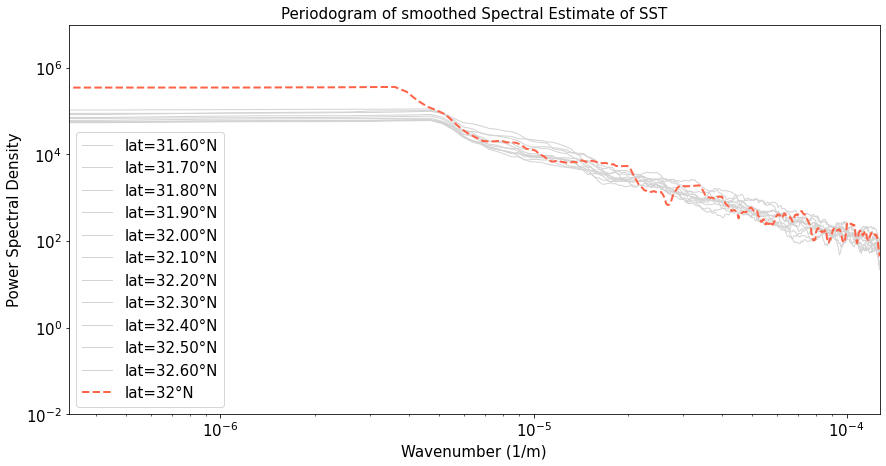

In [71]:
lon_reg = -75, -50
lat_reg = 31.5, 31.7
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
lati = 31.5
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for ii in np.arange(11):
    lat_reg = lat_reg + 0.1*np.ones(2)
    sst_sec = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
    sst_sec = sst_sec.isel(time=t)
    sst_sat = sst_sec.sst_night
    d_sat = sst_sat.lon[1] - sst_sat.lon[0]
    lati +=0.1
    d_sat_res = d_sat.data * delta[32]
    cv = sst_sat[:].data.compute() 
    cv = cv[0,:]
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1, color='lightgrey', label=f"lat={lati:.2f}°N")


#old
lon_reg = lonl
lat_reg = 31.89, 31.91
sst_sec = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
sst_sec = sst_sec.isel(time=t)
sst_sat = sst_sec.sst_night
d_sat = sst_sat.lon[1] - sst_sat.lon[0]
d_sat_res = d_sat.data * delta[32]
cv = sst_sat[:].data.compute() 
cv = cv[0,:]
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/d_sat_res)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linestyle='dashed', linewidth=2, color='tomato', label=f"lat=32°N")

 
    
ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 1e7)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram of smoothed Spectral Estimate of SST',fontsize=15);
#plt.savefig('../images/fft_sst', bbox_inches='tight')